# BUSINESS PROBLEM
Business problem is very simple, There is a Bank who wants to
retain their existing customers who may churn, for that they have to
know which existing customers has the highest probability of
leaving the company and which customers have lowest probability
of leaving the company.
Churning of customers is a big problem for banks, they want to
maximise the retention of the customers so that they can plan their
future projects.
Also if a Bank wants to get a funding from big investors, Rate of
churning plays an important role.

# Data
We have 10000 rows with 13 features and 1 target variable, Every
row tells us different customer details and whether they have
churned or not.

In [1]:
# importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# aglorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable

In [2]:
# importing the file
data = pd.read_csv("C:/Users/HP/Desktop/Study Material/ML_Project/Customer_Churn_Prediction/CSV_Folder/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
data.shape

(10000, 14)

# Checking for Missing Data

In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df_Categorical1 = data.select_dtypes(include=['object'])
df_Categorical1

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [8]:
# now here we will also add following features into the df_Categorical data frame
# and the features are 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember'
df_Categorical2 = data[['Tenure','NumOfProducts', 'HasCrCard','IsActiveMember', 'Exited']]
df_Categorical2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,2,1,1,1,1
1,1,1,0,1,0
2,8,3,1,0,1
3,1,2,0,0,0
4,2,1,1,1,0
...,...,...,...,...,...
9995,5,2,1,0,0
9996,10,1,1,1,0
9997,7,1,0,1,1
9998,3,2,1,0,1


In [9]:
df_Categorical = pd.concat([df_Categorical1, df_Categorical2], axis = 1)
df_Categorical

,Surname,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,Hargrave,France,Female,2,1,1,1,1
1,Hill,Spain,Female,1,1,0,1,0
2,Onio,France,Female,8,3,1,0,1
3,Boni,France,Female,1,2,0,0,0
4,Mitchell,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...,...
9995,Obijiaku,France,Male,5,2,1,0,0
9996,Johnstone,France,Male,10,1,1,1,0
9997,Liu,France,Female,7,1,0,1,1
9998,Sabbatini,Germany,Male,3,2,1,0,1


In [10]:
df_Numerical = data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]
df_Numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


# EDA(Exploratory Data Analysis)

# Uni-Variate Analysis

# Numerical Data

# CreditScore

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

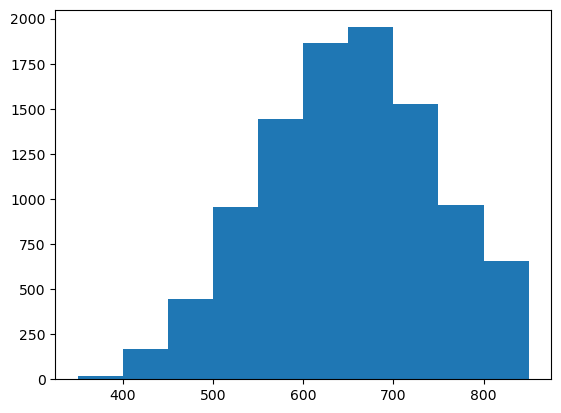

In [11]:
plt.hist(df_Numerical['CreditScore'])
# histogram gives frequency over internval. And col should always be numerical.

# Observations
Here we can see that maximum customers have the CreditScore ranging in between 600 to 700. And very few customers have CreditScore less than 500 and more than 800. 

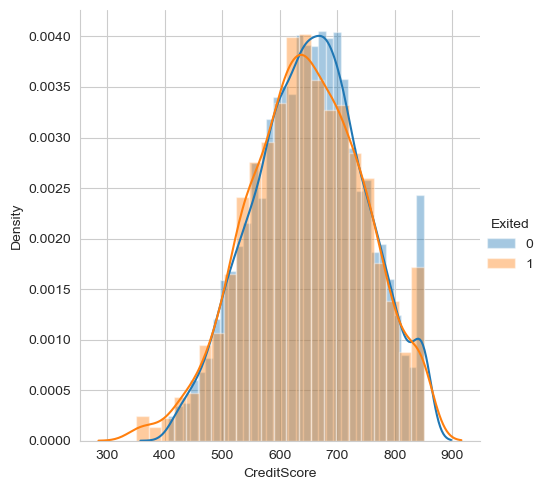

In [12]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.distplot, "CreditScore").add_legend()
plt.show()

# Observations
PDF of CreditScore is not helpful to differentiate between the Number of Customers Churned and the Number of Customers Not Churned.

<Axes: xlabel='Exited', ylabel='CreditScore'>

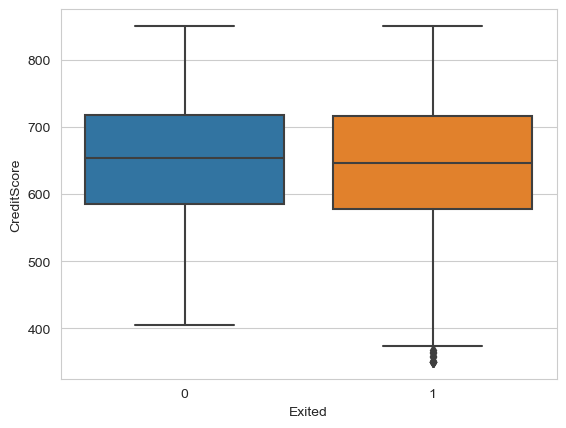

In [13]:
# now boxplot
sns.boxplot(x = "Exited", y = "CreditScore", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data.

# Age

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

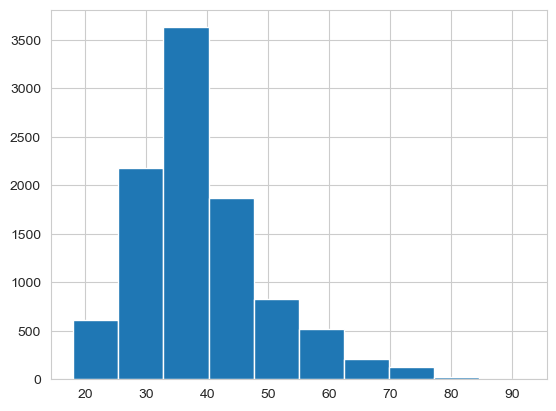

In [14]:
plt.hist(df_Numerical["Age"])

# Observations
Here we can see that the graph is similar to the Right Skewed Distribution Curve.
And as per the graph the maximum number of Customers belong to age ranging between 30 to 40, and there are very few customers with age above 60.

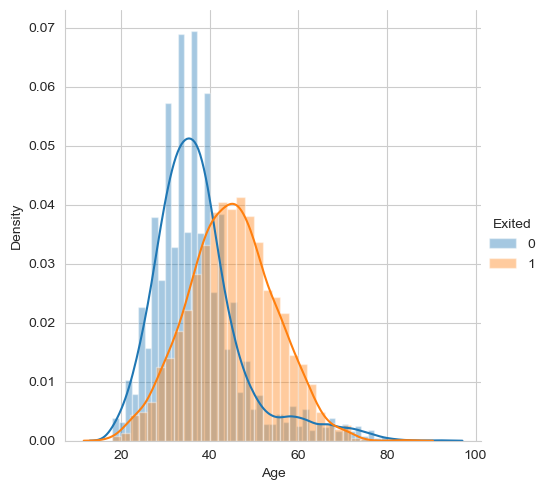

In [15]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.distplot, "Age").add_legend()
plt.show()

# Observations
Here 0 means Customers who have Not Churned (stayed with bank),
and 1 means Customers who have Churned.
By looking at the graph we can say that Cutomers who have Not Churned are ranging between the Age of 30 to 40, whereas the Customers who have Churned are between the Age of 42 to 55.

<Axes: xlabel='Exited', ylabel='Age'>

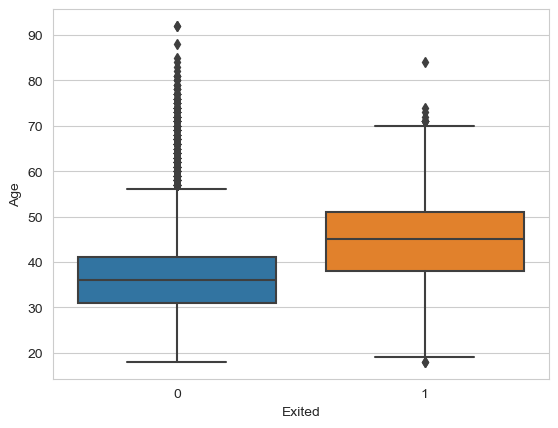

In [16]:
# now boxplot
sns.boxplot(x = "Exited", y = "Age", data = df_Numerical)

# Observations
Here 0 means Customers who have Not Churned (stayed with bank), and 1 means Customers who have Churned. 
By looking at the plot we can say that Cutomers who have Not Churned are ranging between the Age of 30 to 40, whereas the Customers who have Churned are between the Age of 42 to 55. Also there is some ovelapping at Age of 38 to 42.

# Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

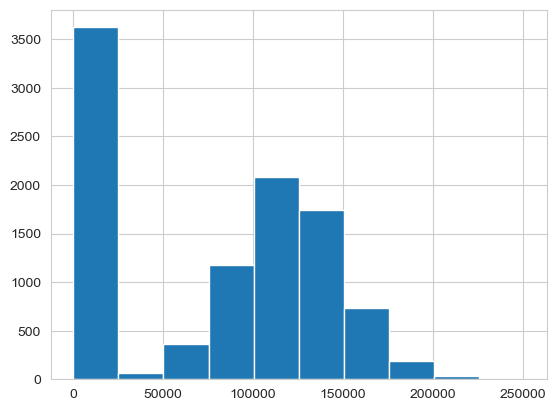

In [17]:
plt.hist(df_Numerical["Balance"])

# Observations
Here we can see that maximum Customers have 0 Balance. There are moderate number of Customers have balance ranging between 100,000 and 150,000. And there are very few Customers whose balance is above 150,000.

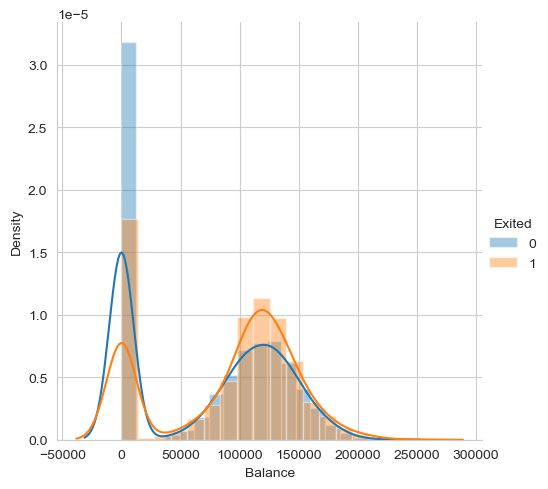

In [18]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.distplot, "Balance").add_legend()
plt.show()

# Observations
PDF of CreditScore is not helpful to differentiate between the Number of Customers Churned and the Number of Customers Not Churned.

<Axes: xlabel='Exited', ylabel='Balance'>

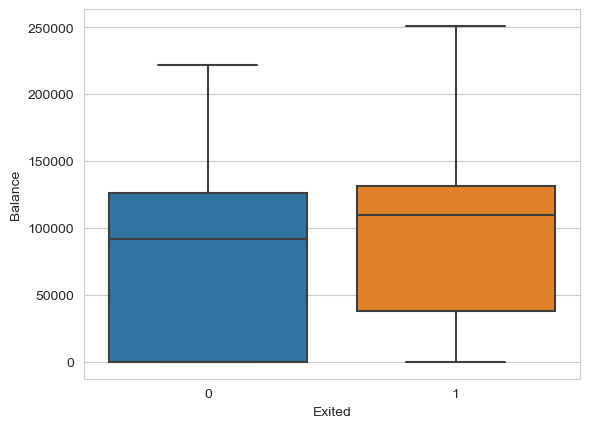

In [19]:
# now boxplot
sns.boxplot(x = "Exited", y = "Balance", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data.

# EstimatedSalary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

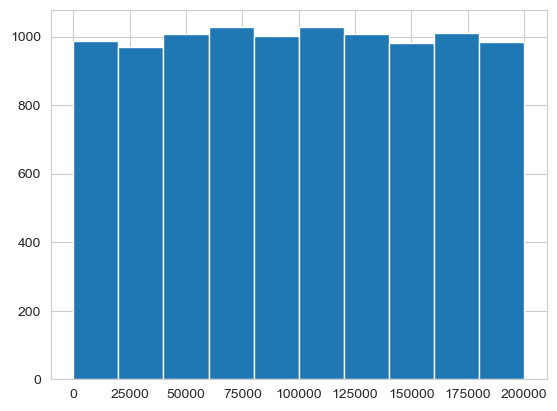

In [20]:
plt.hist(df_Numerical["EstimatedSalary"])

# Observations
Here the graph is similar to Uniform Distribution. And there is not much difference is salary.

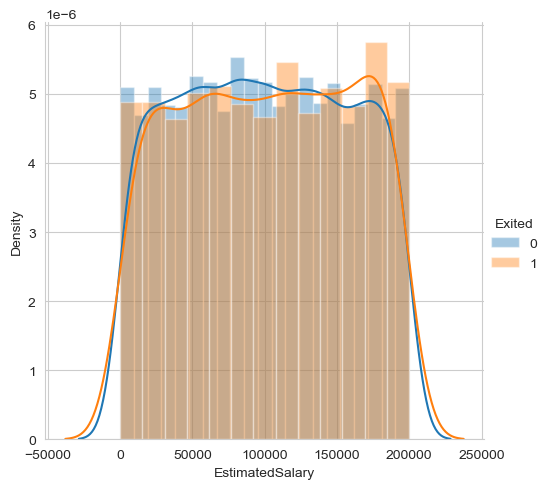

In [21]:
# now distribution plot
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.distplot, "EstimatedSalary").add_legend()
plt.show()

# Observations
PDF of CreditScore is not helpful to differentiate between the Number of Customers Churned and the Number of Customers Not Churned.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

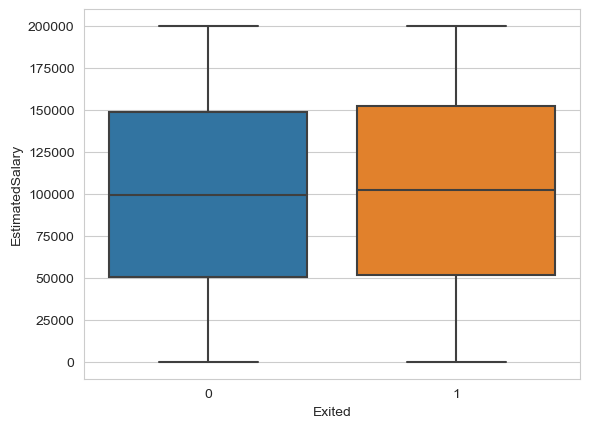

In [22]:
# nox boxplot
sns.boxplot(x = "Exited", y = "EstimatedSalary", data = df_Numerical)

# Observations
Here boxplot is not helping in analysing data.

# Bi-Variate Analysis

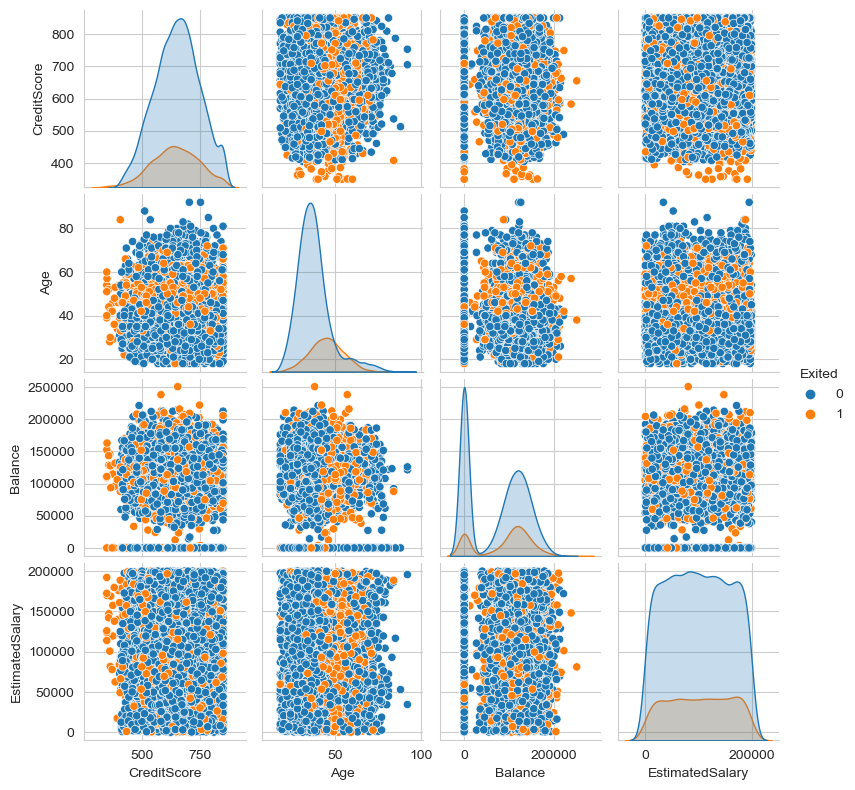

In [23]:
# plotting the pair plot
sns.set_style("whitegrid")
sns.pairplot(df_Numerical, hue = "Exited", height = 2)
plt.show()

# Observations
Here we can see that there is pattern forming between the Age and Creditscore, along with that is one more pattern being formed between EstimatedSalary and Age.

Text(0.5, 1.0, 'Correlation Heatmap')

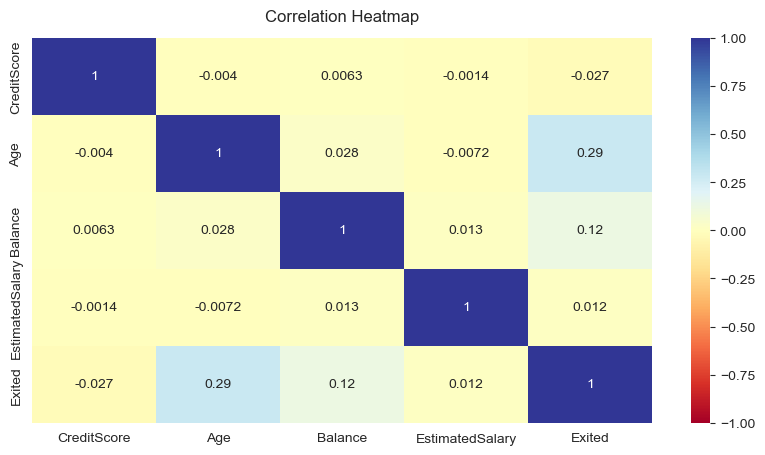

In [24]:
# now finding the correlation between features
custom_cmap = "RdYlBu"
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df_Numerical.corr(), vmin = -1, vmax = 1, annot = True, cmap = custom_cmap)
heatmap.set_title("Correlation Heatmap", fontdict = {'fontsize':12}, pad = 12)

In [25]:
# to get more clear idea we will be plotting the scatterplot for Age and CreditScore as well as for Age and EstimatedSalary

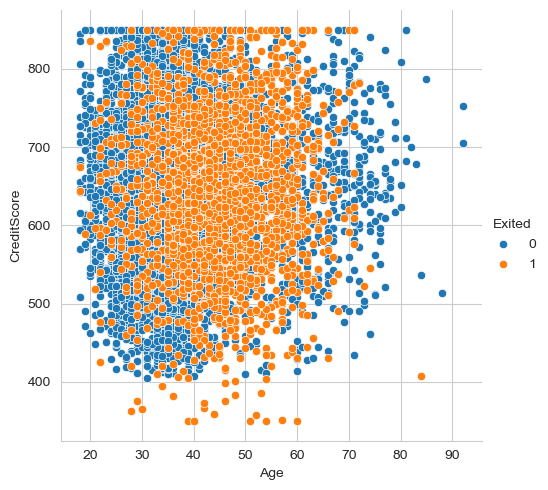

In [26]:
# Scatterplot for Age and CreditScore
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.scatterplot, "Age", "CreditScore").add_legend()
plt.show()

# Observations
Here 0 means Customers who have Not Churned (stayed with bank), and 1 means Customers who have Churned.
By looking at the plot we can see that maximum Customers who have Churned are ranging between the Age of 35 to 55. So it seems that people below 35 and above 55 are most likely to stay with bank.

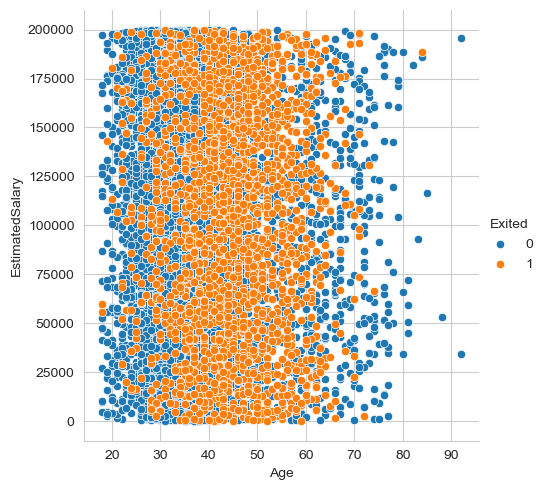

In [27]:
# Scatterplot for Age and EstimatedSalary
sns.set_style("whitegrid")
sns.FacetGrid(df_Numerical, hue = "Exited", height = 5).map(sns.scatterplot, "Age", "EstimatedSalary").add_legend()
plt.show()

# Observations
Here 0 means Customers who have Not Churned (stayed with bank), and 1 means Customers who have Churned. By looking at the plot we can see that maximum Customers who have Churned are ranging between the Age of 35 to 55. So it seems that people below 35 and above 55 are most likely to stay with bank.

# Scaling of Numerical features

In [28]:
scaling = MinMaxScaler()
# Get the list of numerical columns dynamically
numerical_columns = df_Numerical.columns
numerical_columns = numerical_columns.drop('Exited', errors='ignore')
# iterate throught each numerical column and scale it
for column in numerical_columns:
    # Reshape the data to be a 2D array with a single feature
    column_data = df_Numerical[column].values.reshape(-1, 1)
    df_Numerical[column] = scaling.fit_transform(column_data)
df_Numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Categorical Data

In [29]:
df_Categorical.columns

Index(['Surname', 'Geography', 'Gender', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

# Tenure

In [30]:
tenure = df_Categorical["Tenure"].value_counts()
tenure

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<Axes: >

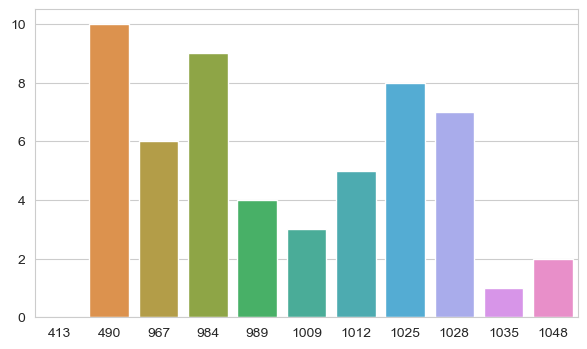

In [31]:
# now plotting the bar plot
plt.figure(figsize=(7,4))
sns.barplot(x = tenure.values, y = tenure.index)

# Observations
Here we can see that Maximum Customers have Tenure of 2 Years and only 490 Customers have Tensure of 10 years.

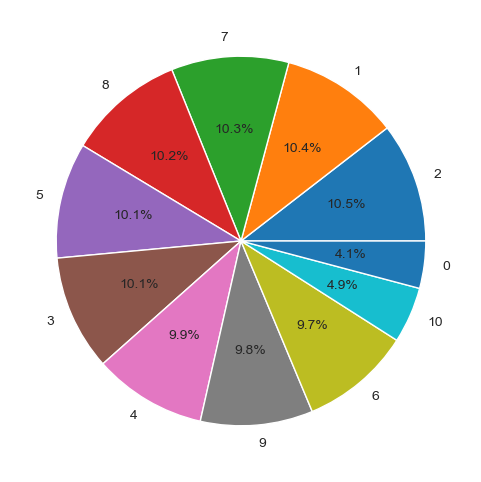

In [32]:
# now pie chart
sizes = tenure.values
labels = tenure.index
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

# Observations
Here we can see that Maximum Customers have Tenure of 2 Years and its share in percentage is 10.4% and 490 Customers have Tensure of 10 years and its share in percentage is 4.9%

# NumOfProducts

In [33]:
numberOfProducts = df_Categorical["NumOfProducts"].value_counts()
numberOfProducts

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: >

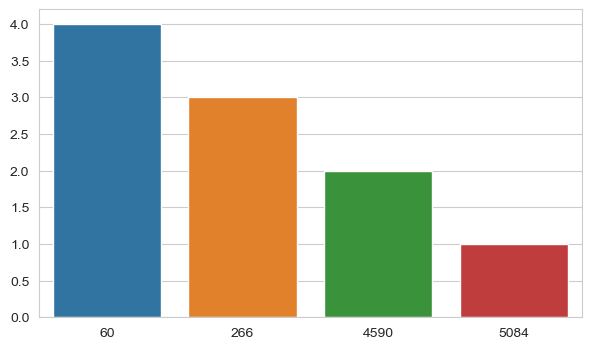

In [34]:
# now plotting bar plot
plt.figure(figsize=(7,4))
sns.barplot(x = numberOfProducts.values, y = numberOfProducts.index)

# Observations
Here we can see that Maximum Customers have only 1 Product.

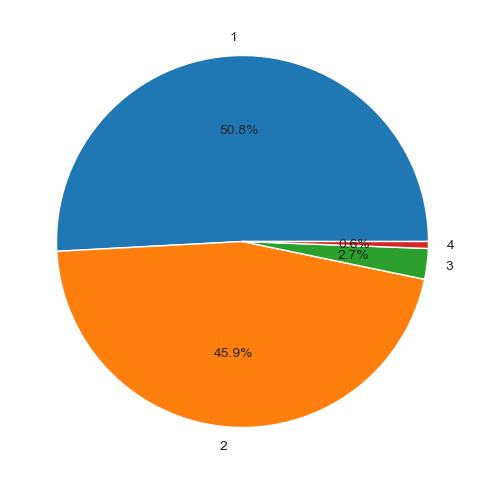

In [35]:
# now pie chart
sizes = numberOfProducts.values
labels = numberOfProducts.index
plt.figure(figsize=(6,8))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

# Observations
Here we can see that as Maximum Customers have 1 Product and its share in percentage is 50.8%.

# HasCrCard

In [36]:
hasCrCard = df_Categorical["HasCrCard"].value_counts()
hasCrCard

1    7055
0    2945
Name: HasCrCard, dtype: int64

<Axes: >

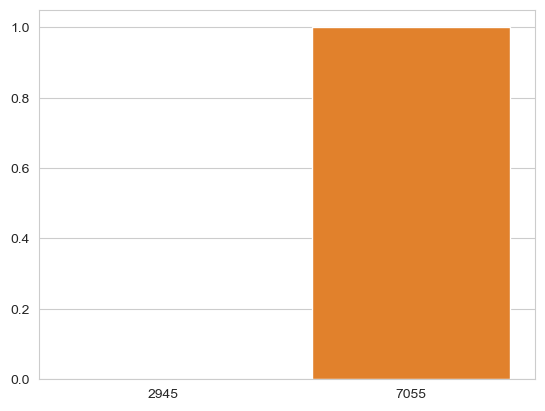

In [37]:
# now bar plot
sns.barplot(x = hasCrCard.values, y = hasCrCard.index)

# Observations
Here we come to know that 2945 Customers do not have creditcard while 7055 Customers have credit card.

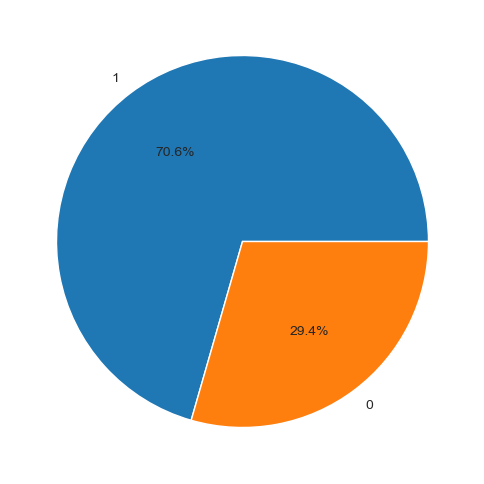

In [38]:
# now pie chart
sizes = hasCrCard.values
labels = hasCrCard.index
plt.figure(figsize=(6,8))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()

# Observations
Here as we know that 7055 Customers have credit card and there share in percentage is 70.6.

In [39]:
# now we will be using 1 HOT ENCODING Technique for converting the categorical data into numerical format 

In [40]:
# Combining the Categorical and Numerical Columns together and forming a dataframe

In [41]:
df_Categorical3 = df_Categorical.drop(["Exited","Surname"], axis = 1)
df_Categorical3

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,2,1,1,1
1,Spain,Female,1,1,0,1
2,France,Female,8,3,1,0
3,France,Female,1,2,0,0
4,Spain,Female,2,1,1,1
...,...,...,...,...,...,...
9995,France,Male,5,2,1,0
9996,France,Male,10,1,1,1
9997,France,Female,7,1,0,1
9998,Germany,Male,3,2,1,0


In [42]:
categorical = ['Geography','Gender']
df_Categorical3 = pd.get_dummies(df_Categorical3,columns=categorical,drop_first=False)
df_Categorical3

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,1,1,0
2,8,3,1,0,1,0,0,1,0
3,1,2,0,0,1,0,0,1,0
4,2,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1
9996,10,1,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,1,0
9998,3,2,1,0,0,1,0,0,1


In [43]:
df_final = pd.concat([df_Categorical3, df_Numerical], axis = 1)
df_final

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


In [44]:
# now forming the x = independent variables/features and y = class lables/dependent variables
y = df_final["Exited"]

In [45]:
x = df_final.iloc[:, : 13]
x

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [46]:
# now splitting the data into training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [47]:
print(xtrain.shape)
print(xtest.shape)

(8000, 13)
(2000, 13)


In [48]:
print(ytrain.shape)
print(ytest.shape)

(8000,)
(2000,)


In [49]:
ytrain.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

# Modelling

In [50]:
final_Data_Train = {}
final_Data_Test = {}

In [51]:
logistic_Train = {}
logistic_Test = {}

# Logistic Regression

In [52]:
# parameters for trianing
tunning_paramters = [{"C":[10**-4,10**-2,10**0,10**2,10**4]}]
# creat GridSearchCV Object
LogisticRegression_model = GridSearchCV(LogisticRegression(max_iter=400), tunning_paramters)
# training of model
LogisticRegression_model.fit(xtrain,ytrain)
# print the best estimator found by the GridSearchCV
print(LogisticRegression_model.best_estimator_)
# evaluate the model on train set
print(LogisticRegression_model.score(xtrain,ytrain))
# evaluate the model on test set
print(LogisticRegression_model.score(xtest,ytest))

LogisticRegression(C=1, max_iter=400)
0.811375
0.8125


In [53]:
# predictions
# training predictions
LogisticRegression_Train_Prediction = LogisticRegression_model.predict(xtrain)
# testing predictions
LogisticRegression_Test_Prediction = LogisticRegression_model.predict(xtest)

In [54]:
#evaluation of Logistic Regression
# Training Data
x_LogisticRegression_Train_F1_Score = f1_score(ytrain, LogisticRegression_Train_Prediction)
print("Training F1 Score is: ", x_LogisticRegression_Train_F1_Score)
logistic_Train["F1_Score"] = round(x_LogisticRegression_Train_F1_Score,4)

# Testing Data
x_LogisticRegression_Test_F1_Score = f1_score(ytest, LogisticRegression_Test_Prediction)
print("Testing F1 Score is: ", x_LogisticRegression_Test_F1_Score)
logistic_Test["F1_Score"] = round(x_LogisticRegression_Test_F1_Score,4)

Training F1 Score is:  0.31064412973960714
Testing F1 Score is:  0.28571428571428575


In [55]:
# Finding the Precsion Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Precision_Score = precision_score(ytrain,LogisticRegression_Train_Prediction)
print("Training Precision Score is: ", x_LogisticRegression_Train_Precision_Score)
logistic_Train["Precision"] = round(x_LogisticRegression_Train_Precision_Score,4)

# Testing Data
x_LogisticRegression_Test_Precision_Score = precision_score(ytest,LogisticRegression_Test_Prediction)
print("Testing Precision Score is: ", x_LogisticRegression_Test_Precision_Score)
logistic_Test["Precision"] = round(x_LogisticRegression_Test_Precision_Score,4)

Training Precision Score is:  0.6238532110091743
Testing Precision Score is:  0.5681818181818182


In [56]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Recall_Score = recall_score(ytrain,LogisticRegression_Train_Prediction)
print("Training Recall Score is ", x_LogisticRegression_Train_Recall_Score)
logistic_Train["Recall"] = round(x_LogisticRegression_Train_Recall_Score, 4)

# Testing Data'
x_LogisticRegression_Test_Recall_Score = recall_score(ytest,LogisticRegression_Test_Prediction)
print("Testing Recall Score is ", x_LogisticRegression_Test_Recall_Score)
logistic_Test["Recall"] = round(x_LogisticRegression_Test_Recall_Score, 4)


Training Recall Score is  0.20681265206812652
Testing Recall Score is  0.19083969465648856


In [57]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_LogisticRegression_Train_Accuracy_Score = accuracy_score(ytrain,LogisticRegression_Train_Prediction)
print("Training Accuracy Score is ", x_LogisticRegression_Train_Accuracy_Score)
logistic_Train["Accuracy"] = round(x_LogisticRegression_Train_Accuracy_Score, 4)

# Testing Data
x_LogisticRegression_Test_Accuracy_Score = accuracy_score(ytest,LogisticRegression_Test_Prediction)
print("Training Accuracy Score is ", x_LogisticRegression_Test_Accuracy_Score)
logistic_Test["Accuracy"] = round(x_LogisticRegression_Test_Accuracy_Score, 4)

Training Accuracy Score is  0.811375
Training Accuracy Score is  0.8125


In [58]:
print("Train Scores")
print(logistic_Train)
print("Test Score")
print(logistic_Test)

final_Data_Train["Logistic"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Logistic"].update(logistic_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Logistic"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Logistic"].update(logistic_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}
Test Score
{'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}
final_Data_Train {'Logistic': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}}
final_Data_Test {'Logistic': {}}
final_Data_Test
{'Logistic': {'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}}


# Decision Tree

In [59]:
Decision_Tree_Train = {}
Decision_Tree_Test = {}

In [60]:
# Define tuning parameters for the Decision Tree classifier
tree_tuning_parameter = [{"max_depth" : [4,5,6]}]
# Create a Decision Tree classifier with specified parameters
Decision_Tree_Classifier = tree.DecisionTreeClassifier(min_samples_split = 5, random_state = 42)
# Create a GridSearchCV Object with decision tree classifier and tunning parameters
DecisionTree_Classifier = GridSearchCV(Decision_Tree_Classifier, tree_tuning_parameter)
# Train the model on the training data
DecisionTree_Classifier.fit(xtrain,ytrain)
# Print the best estimated values found by GridSearchCV
print(DecisionTree_Classifier.best_estimator_)
# evaluate the model on the training data
print(DecisionTree_Classifier.score(xtrain,ytrain))
# evalue the model on the Testing Data
print(DecisionTree_Classifier.score(xtest,ytest))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
0.865875
0.8595


In [61]:
# predictions
# training predictions
Decision_Tree_Classifier_Train_Predicition = DecisionTree_Classifier.predict(xtrain)
# testing predictions
Decision_Tree_Classifier_Test_Predicition = DecisionTree_Classifier.predict(xtest)

In [62]:
#evaluation of Decision Tree
# Training Data
x_Decision_Tree_Classifier_Train_F1_Score = f1_score(ytrain, Decision_Tree_Classifier_Train_Predicition)
print("Training F1 Score is: ", x_Decision_Tree_Classifier_Train_F1_Score)
Decision_Tree_Train["F1_Score"] = round(x_Decision_Tree_Classifier_Train_F1_Score, 4)

# Testing Data
x_Decision_Tree_Classifier_Test_F1_Score = f1_score(ytest, Decision_Tree_Classifier_Test_Predicition)
print("Testing F1 Score is: ", x_Decision_Tree_Classifier_Test_F1_Score)
Decision_Tree_Test["F1_Score"] = round(x_Decision_Tree_Classifier_Test_F1_Score, 4)

Training F1 Score is:  0.5927893738140418
Testing F1 Score is:  0.5574803149606299


In [63]:
# Finding the Precsion Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Precision_Score = precision_score(ytrain, Decision_Tree_Classifier_Train_Predicition)
print("Training Precision Score is: ", x_Decision_Tree_Classifier_Train_Precision_Score)
Decision_Tree_Train["Precision"] = round(x_Decision_Tree_Classifier_Train_Precision_Score, 4)

#Testing Data
x_Decision_Tree_Classifier_Test_Precision_Score = precision_score(ytest, Decision_Tree_Classifier_Test_Predicition)
print("Testing Precision Score is: ", x_Decision_Tree_Classifier_Test_Precision_Score)
Decision_Tree_Test["Precision"] = round(x_Decision_Tree_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.7880928355196771
Testing Precision Score is:  0.731404958677686


In [64]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Recall_Score = recall_score(ytrain, Decision_Tree_Classifier_Train_Predicition)
print("Traing Recall Score is: ", x_Decision_Tree_Classifier_Train_Recall_Score)
Decision_Tree_Train["Recall"] = round(x_Decision_Tree_Classifier_Train_Recall_Score, 4)

#Testing Score
x_Decision_Tree_Classifier_Test_Recall_Score = recall_score(ytest, Decision_Tree_Classifier_Test_Predicition)
print("Testing Recall Score is: ", x_Decision_Tree_Classifier_Test_Recall_Score)
Decision_Tree_Test["Recall"] = round(x_Decision_Tree_Classifier_Test_Recall_Score, 4)

Traing Recall Score is:  0.4750608272506083
Testing Recall Score is:  0.45038167938931295


In [65]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_Decision_Tree_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, Decision_Tree_Classifier_Train_Predicition)
print("Training Accuracy Score is: ", x_Decision_Tree_Classifier_Train_Accuracy_Score)
Decision_Tree_Train["Accuracy"] = round(x_Decision_Tree_Classifier_Train_Accuracy_Score, 4)

# Testing Score
x_Decision_Tree_Classifier_Test_Accuracy_Score = accuracy_score(ytest, Decision_Tree_Classifier_Test_Predicition)
print("Testing Accuracy Score is: ", x_Decision_Tree_Classifier_Test_Accuracy_Score)
Decision_Tree_Test["Accuracy"] = round(x_Decision_Tree_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.865875
Testing Accuracy Score is:  0.8595


In [66]:
print("Train Scores")
print(Decision_Tree_Train)
print("Test Score")
print(Decision_Tree_Test)

final_Data_Train["Decision Tree"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Decision Tree"].update(Decision_Tree_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Decision Tree"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Decision Tree"].update(Decision_Tree_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}
Test Score
{'F1_Score': 0.5575, 'Precision': 0.7314, 'Recall': 0.4504, 'Accuracy': 0.8595}
final_Data_Train {'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}}
final_Data_Test {'Logistic': {'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}, 'Decision Tree': {}}
final_Data_Test
{'Logistic': {'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}, 'Decision Tree': {'F1_Score': 0.5575, 'Precision': 0.7314, 'Recall': 0.4504, 'Accuracy': 0.8595}}


# Random Forest

In [67]:
Random_Forest_Train = {}
Random_Forest_Test = {}

In [68]:
# defining the tunning parameters for the random forest classifier
forest_tunning_parameter = [{"max_depth" : [4,5,6], "n_estimators" : [200,300,400,500]}]
# creating the randowm forest classifier with specified parametrs
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)
#Create a GridSearchCV object with Random Forest Classifier and tunning parameters
# Here we are not using verbose = 2, which is for detailed output(like logs)
# here n_jobs = -1 is to enable the parallel processing
RF_Classifier = GridSearchCV(estimator = Random_Forest_Classifier, param_grid = forest_tunning_parameter, cv = 3, n_jobs = -1)
# Train the model with the training data
RF_Classifier.fit(xtrain,ytrain)
# print the best estimator found by the GridSearhCV
print(RF_Classifier.best_estimator_)
# evaluting the model on training data
print(RF_Classifier.score(xtrain,ytrain))
# evaluting the model on testing data
print(RF_Classifier.score(xtest,ytest))

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42)
0.8625
0.8545


In [69]:
# Creating the Random forest classifiers with specified parameters
Random_Forest_Classifier = RandomForestClassifier(random_state = 42, criterion = "entropy", n_estimators = 500, max_depth = 6, max_features = "auto")
# training the random forest
RF_Classifier_TP = Random_Forest_Classifier.fit(xtrain,ytrain)
# evalute the model on the training model
print(RF_Classifier_TP.score(xtrain,ytrain))
# evaluate the model on the testing model
print(RF_Classifier_TP.score(xtest,ytest))

0.860875
0.856


In [70]:
# predictions
# training predictions
RF_Classifier_TP_Train_Predicition = RF_Classifier_TP.predict(xtrain)
# testing predictions
RF_Classifier_TP_Test_Predicition = RF_Classifier_TP.predict(xtest)

In [71]:
# evaluating the random forest
# training data
x_Random_Forest_Classifier_Train_F1_Score = f1_score(ytrain, RF_Classifier_TP_Train_Predicition)
print("Training F1 Score is: ", x_Random_Forest_Classifier_Train_F1_Score)
Random_Forest_Train["F1_Score"] = round(x_Random_Forest_Classifier_Train_F1_Score, 4)

# testing data
x_Random_Forest_Classifier_Test_F1_Score = f1_score(ytest, RF_Classifier_TP_Test_Predicition)
print("Testing F1 Score is: ", x_Random_Forest_Classifier_Test_F1_Score)
Random_Forest_Test["F1_Score"] = round(x_Random_Forest_Classifier_Test_F1_Score, 4)

Training F1 Score is:  0.515032679738562
Testing F1 Score is:  0.4686346863468635


In [72]:
# Finding the Precision Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Precision_Score = precision_score(ytrain, RF_Classifier_TP_Train_Predicition)
print("Training Precision Score is: ", x_Random_Forest_Classifier_Train_Precision_Score)
Random_Forest_Train["Precision"] = round(x_Random_Forest_Classifier_Train_Precision_Score, 4)

# testing data
x_Random_Forest_Classifier_Test_Precision_Score = precision_score(ytest, RF_Classifier_TP_Test_Predicition)
print("Testing Precision Score is: ", x_Random_Forest_Classifier_Test_Precision_Score)
Random_Forest_Test["Precision"] = round(x_Random_Forest_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.9078341013824884
Testing Precision Score is:  0.8523489932885906


In [73]:
# Finding the Recall Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Recall_Score = recall_score(ytrain, RF_Classifier_TP_Train_Predicition)
print("Training Recall Score is: ", x_Random_Forest_Classifier_Train_Recall_Score)
Random_Forest_Train["Recall"] = round(x_Random_Forest_Classifier_Train_Precision_Score, 4)

# Testing Data
x_Random_Forest_Classifier_Test_Recall_Score = recall_score(ytest, RF_Classifier_TP_Test_Predicition)
print("Training Recall Score is: ", x_Random_Forest_Classifier_Test_Recall_Score)
Random_Forest_Test["Recall"] = round(x_Random_Forest_Classifier_Test_Recall_Score, 4)

Training Recall Score is:  0.3594890510948905
Training Recall Score is:  0.3231552162849873


In [74]:
# Finding the Accuracy Score for Training and Testing Data
# Training Data
x_Random_Forest_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, RF_Classifier_TP_Train_Predicition)
print("Training Accuracy Score is: ", x_Random_Forest_Classifier_Train_Accuracy_Score)
Random_Forest_Train["Accuracy"] = round(x_Random_Forest_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_Random_Forest_Classifier_Test_Accuracy_Score = accuracy_score(ytest, RF_Classifier_TP_Test_Predicition)
print("Training Accuracy Score is: ", x_Random_Forest_Classifier_Test_Accuracy_Score)
Random_Forest_Test["Accuracy"] = round(x_Random_Forest_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.860875
Training Accuracy Score is:  0.856


In [75]:
print("Train Scores")
print(Random_Forest_Train)
print("Test Score")
print(Random_Forest_Test)

final_Data_Train["Random Forst"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["Random Forst"].update(Random_Forest_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["Random Forst"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["Random Forst"].update(Random_Forest_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}
Test Score
{'F1_Score': 0.4686, 'Precision': 0.8523, 'Recall': 0.3232, 'Accuracy': 0.856}
final_Data_Train {'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}}
final_Data_Test {'Logistic': {'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}, 'Decision Tree': {'F1_Score': 0.5575, 'Precision': 0.7314, 'Recall': 0.4504, 'Accuracy': 0.8595}, 'Random Forst': {}}
final_Data_Test
{'Logistic': {'F1_Score': 0.2857, 'Preci

# KNN (K-Nearest Neighbour)

In [76]:
KNN_Train = {}
KNN_Test = {}

In [79]:
# defining the tunning parameters
k_tunning_parameter = [{"n_neighbors" : [3,5,7,9]}]
# creating the knn classifier
KNN_C = KNeighborsClassifier()
# Creating the GridSearCv object with tunning parameters
KNN_Classifier = GridSearchCV(KNN_C, k_tunning_parameter, scoring = "accuracy")
# train the model
KNN_Classifier.fit(xtrain,ytrain)
# print the best estimator found by the GridSearchCV
print(KNN_Classifier.best_estimator_)
# evaluating the model on the training data
print(KNN_Classifier.score(xtrain,ytrain))
# evalauting the model on the testing data
print(KNN_Classifier.score(xtest,ytest))

KNeighborsClassifier(n_neighbors=7)
0.847625
0.8165


In [82]:
# predictions
# Training Data
KNN_Classifier_Train_Predicitions = KNN_Classifier.predict(xtrain)
# Testing Data
KNN_Classifier_Test_Predictions = KNN_Classifier.predict(xtest)

In [81]:
# evaluation
# training data
x_KNN_Classifier_Train_F1_Score = f1_score(ytrain, KNN_Classifier_Train_Predicitions)
print("Training F1 Score is: ", x_KNN_Classifier_Train_F1_Score)
KNN_Train["F1_Score"] = round(x_KNN_Classifier_Train_F1_Score, 4)

# testing data
x_KNN_Classifier_Test_F1_Score = f1_score(ytest, KNN_Classifier_Test_Predictions)
print("Testing F1 Score is: ", x_KNN_Classifier_Test_F1_Score)
KNN_Test["F1_Score"] = round(x_KNN_Classifier_Test_F1_Score, 4)

Training F1 Score is:  0.5098512263771612
Training F1 Score is:  0.34111310592459604


In [83]:
# Finiding the Precision for the Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Precision_Score = precision_score(ytrain, KNN_Classifier_Train_Predicitions)
print("Training Precision Score is: ", x_KNN_Classifier_Train_Precision_Score)
KNN_Train["Precision"] = round(x_KNN_Classifier_Train_Precision_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Precision_Score = precision_score(ytest, KNN_Classifier_Test_Predictions)
print("Testing Precision Score is: ", x_KNN_Classifier_Test_Precision_Score)
KNN_Test["Precision"] = round(x_KNN_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.7520759193357058
Testing Precision Score is:  0.5792682926829268


In [84]:
# Finding the Recall for the Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Recall_Score = recall_score(ytrain, KNN_Classifier_Train_Predicitions)
print("Training Recall Score is: ", x_KNN_Classifier_Train_Recall_Score)
KNN_Train["Recall"] = round(x_KNN_Classifier_Train_Recall_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Recall_Score = recall_score(ytest, KNN_Classifier_Test_Predictions)
print("Testing Recall Score is: ", x_KNN_Classifier_Test_Recall_Score)
KNN_Test["Recall"] = round(x_KNN_Classifier_Test_Recall_Score, 4)

Training Recall Score is:  0.38564476885644766
Testing Recall Score is:  0.24173027989821882


In [89]:
# Finding the Accuracy for the Training and Testing Data
# Training Data
x_KNN_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, KNN_Classifier_Train_Predicitions)
print("Training Accuracy Score is: ", x_KNN_Classifier_Train_Accuracy_Score)
KNN_Train["Accuracy"] = round(x_KNN_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_KNN_Classifier_Test_Accuracy_Score = accuracy_score(ytest, KNN_Classifier_Test_Predictions)
print("Testing Accuracy Score is: ", x_KNN_Classifier_Test_Accuracy_Score)
KNN_Test["Accuracy"] = round(x_KNN_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.847625
Testing Accuracy Score is:  0.8165


In [90]:
print("Train Score")
print(KNN_Train)
print("test Score")
print(KNN_Test)

final_Data_Train["KNN"] = {}
print("final_Data_train", final_Data_Train)
# adding key-value pair to the newly created dictionary'
final_Data_Train["KNN"].update(KNN_Train)
print("final_Data_train")
print(final_Data_Train)

final_Data_Test["KNN"] = {}
print("final_Data_Test", final_Data_Test)
# adding the key-value pair to the newly created dictionary
final_Data_Test["KNN"].update(KNN_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Score
{'F1_Score': 0.5099, 'Precision': 0.7521, 'Recall': 0.3856, 'Accuracy': 0.8476}
test Score
{'F1_Score': 0.3411, 'Precision': 0.5793, 'Recall': 0.2417, 'Accuracy': 0.8165}
final_Data_train {'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}, 'KNN': {}}
final_Data_train
{'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}, 'KNN': {'F1_Score': 0.5099, 'Precision': 0.7521, 'Recall': 0.3856, 'Accuracy': 0.8476}}
final_Data_Test {'Logistic': {'F1_Score': 0.2857, 'Precision': 0.5682, 'Recall': 0.1908, 'Accuracy': 0.8125}

# SVM (Support Vector MAchine)

In [91]:
SVM_Train = {}
SVM_Test = {}

In [92]:
# defining the tunning parameters
svm_tunning_Parameter = [{"C" : [0.1, 1, 10, 100], "gamma" : [0.01, 0.1, 1, 10]}]
# creating the SVM Classifier
SVM_C = SVC()
# creating the GridSearchCV Object
SVM_Classifier = GridSearchCV(SVM_C, svm_tunning_Parameter, scoring = "accuracy")
# training the model
SVM_Classifier.fit(xtrain,ytrain)
# Print the best estimator found by the GridSearchCV
print(SVM_Classifier.best_estimator_)
# evaluting the training model
print(SVM_Classifier.score(xtrain, ytrain))
# evaluating the testing model
print(SVM_Classifier.score(xtest, ytest))

SVC(C=100, gamma=0.1)
0.871375
0.8565


In [93]:
# prediction
# training data
SVM_Classifier_Train_Predicitions = SVM_Classifier.predict(xtrain)
# testing data
SVM_Classifier_Test_Predicitions = SVM_Classifier.predict(xtest)

In [94]:
# evaluation
x_SVM_Classifier_Train_F1_Score = f1_score(ytrain, SVM_Classifier_Train_Predicitions)
print("Training F1_Score is: ", x_SVM_Classifier_Train_F1_Score)
SVM_Train["F1_Score"] = round(x_SVM_Classifier_Train_F1_Score, 4)

x_SVM_Classifier_Test_F1_Score = f1_score(ytest, SVM_Classifier_Test_Predicitions)
print("Testing F1_Score is: ", x_SVM_Classifier_Test_F1_Score)
SVM_Test["F1_Score"] = round(x_SVM_Classifier_Test_F1_Score, 4)

Training F1_Score is:  0.5921521997621878
Testing F1_Score is:  0.5208681135225376


In [95]:
# Finding the Precision for the Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Precision_Score = precision_score(ytrain, SVM_Classifier_Train_Predicitions)
print("Training Precision Score is: ", x_SVM_Classifier_Train_Precision_Score)
SVM_Train["Precision"] = round(x_SVM_Classifier_Train_Precision_Score, 4) 

# Testing Data
x_SVM_Classifier_Test_Precision_Score = precision_score(ytest, SVM_Classifier_Test_Predicitions)
print("Testing Precision Score is: ", x_SVM_Classifier_Test_Precision_Score)
SVM_Test["Precision"] = round(x_SVM_Classifier_Test_Precision_Score, 4)

Training Precision Score is:  0.8498293515358362
Testing Precision Score is:  0.7572815533980582


In [96]:
# Finding the Recall for the Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Recall_Score = recall_score(ytrain, SVM_Classifier_Train_Predicitions)
print("Training Recall Score is: ", x_SVM_Classifier_Train_Recall_Score)
SVM_Train["Recall"] = round(x_SVM_Classifier_Train_Recall_Score, 4)

# Testing Data
x_SVM_Classifier_Test_Recall_Score = recall_score(ytest, SVM_Classifier_Test_Predicitions)
print("Testing Recall Score is: ", x_SVM_Classifier_Test_Recall_Score)
SVM_Test["Recall"] = round(x_SVM_Classifier_Test_Recall_Score, 4)

Training Recall Score is:  0.4543795620437956
Testing Recall Score is:  0.3969465648854962


In [97]:
# Finding the Accuracy for the Training and Testing Data
# Training Data
x_SVM_Classifier_Train_Accuracy_Score = accuracy_score(ytrain, SVM_Classifier_Train_Predicitions)
print("Training Accuracy Score is: ", x_SVM_Classifier_Train_Accuracy_Score)
SVM_Train["Accuracy"] = round(x_SVM_Classifier_Train_Accuracy_Score, 4)

# Testing Data
x_SVM_Classifier_Test_Accuracy_Score = accuracy_score(ytest, SVM_Classifier_Test_Predicitions)
print("Testing Accuracy Score is: ", x_SVM_Classifier_Test_Accuracy_Score)
SVM_Test["Accuracy"] = round(x_SVM_Classifier_Test_Accuracy_Score, 4)

Training Accuracy Score is:  0.871375
Testing Accuracy Score is:  0.8565


In [98]:
print("Train Scores")
print(SVM_Train)
print("Test Score")
print(SVM_Test)

final_Data_Train["SVM"] = {}
print("final_Data_Train", final_Data_Train)
# Add the key-value pair to the newly created dictionary
final_Data_Train["SVM"].update(SVM_Train)
print("final_Data_Train")
print(final_Data_Train)

final_Data_Test["SVM"] = {}
print("final_Data_Test", final_Data_Test)
# Add the key-value pair to the newly created dictionary
final_Data_Test["SVM"].update(SVM_Test)
print("final_Data_Test")
print(final_Data_Test)

Train Scores
{'F1_Score': 0.5922, 'Precision': 0.8498, 'Recall': 0.4544, 'Accuracy': 0.8714}
Test Score
{'F1_Score': 0.5209, 'Precision': 0.7573, 'Recall': 0.3969, 'Accuracy': 0.8565}
final_Data_Train {'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}, 'KNN': {'F1_Score': 0.5099, 'Precision': 0.7521, 'Recall': 0.3856, 'Accuracy': 0.8476}, 'SVM': {}}
final_Data_Train
{'Logistic': {'F1_Score': 0.3106, 'Precision': 0.6239, 'Recall': 0.2068, 'Accuracy': 0.8114}, 'Decision Tree': {'F1_Score': 0.5928, 'Precision': 0.7881, 'Recall': 0.4751, 'Accuracy': 0.8659}, 'Random Forst': {'F1_Score': 0.515, 'Precision': 0.9078, 'Recall': 0.9078, 'Accuracy': 0.8609}, 'KNN': {'F1_Score': 0.5099, 'Precision': 0.7521, 'Recall': 0.3856, 'Accuracy': 0.8476}, 'SVM': {'F1_Score':

# Conclusion:

In [100]:
# Final Observations:
train_Table = PrettyTable()
train_Table.field_names = ["Algorithm", "F1_Score", "Precision", "Recall", "Accuracy"]
#iterating through dictionary
for algorithm, metrics in final_Data_Train.items():
    # extract metrics
    f1_score = metrics.get("F1_Score", "-")
    precision = metrics.get("Precision", "-")
    recall = metrics.get("Recall", "-")
    accuracy = metrics.get("Accuracy", "-")
    # now adding rows to the table
    train_Table.add_row([algorithm, f1_score, precision, recall, accuracy])
print(train_Table)

+---------------+----------+-----------+--------+----------+
|   Algorithm   | F1_Score | Precision | Recall | Accuracy |
+---------------+----------+-----------+--------+----------+
|    Logistic   |  0.3106  |   0.6239  | 0.2068 |  0.8114  |
| Decision Tree |  0.5928  |   0.7881  | 0.4751 |  0.8659  |
|  Random Forst |  0.515   |   0.9078  | 0.9078 |  0.8609  |
|      KNN      |  0.5099  |   0.7521  | 0.3856 |  0.8476  |
|      SVM      |  0.5922  |   0.8498  | 0.4544 |  0.8714  |
+---------------+----------+-----------+--------+----------+


In [101]:
# Final Observations
test_Table = PrettyTable()
test_Table.field_names = ["Algorithm", "F1_Score", "Precision", "Recall", "Accuracy"]
# iterating through the dictionary
for algorithm, metrics in final_Data_Test.items():
    # extract metrics
    f1_score = metrics.get("F1_Score", "-")
    precision = metrics.get("Precision", "-")
    recall = metrics.get("Recall", "-")
    accuracy = metrics.get("Accuracy","-")
    # now adding rows to the table
    test_Table.add_row([algorithm, f1_score, precision, recall, accuracy])
print(test_Table)

+---------------+----------+-----------+--------+----------+
|   Algorithm   | F1_Score | Precision | Recall | Accuracy |
+---------------+----------+-----------+--------+----------+
|    Logistic   |  0.2857  |   0.5682  | 0.1908 |  0.8125  |
| Decision Tree |  0.5575  |   0.7314  | 0.4504 |  0.8595  |
|  Random Forst |  0.4686  |   0.8523  | 0.3232 |  0.856   |
|      KNN      |  0.3411  |   0.5793  | 0.2417 |  0.8165  |
|      SVM      |  0.5209  |   0.7573  | 0.3969 |  0.8565  |
+---------------+----------+-----------+--------+----------+


# Observations
Based on the above results we can say that Decision Tree Classifier gives us the highest accuracy, followed by SVM, Random Forest, KNN and Logistic Regression.